# Customer Segmentation Analysis

# preparing datasets and dataframes

In [ ]:
# import requred libraries

In [1]:
import pandas as pd                              # handle dataframes
from sklearn.cluster import KMeans               # perform kmean clustering data for analysis
from sklearn.preprocessing import StandardScaler # standardizes numerical features by scaling them to have zero mean and unit variance
import numpy as np                               # using numeric arrey during processing and visualization
import seaborn as sns                            # visualize data using grapghs using aggrigation and summeries
import matplotlib.pyplot as plt                  # plot basic grapghs and visuals

In [ ]:
# assigning all datset location to variables

In [3]:
path_orders = r"C:\Users\Vinayak\Data Analyst - Raw Data (1)\formatted_datasets\orders_formatted.csv"
path_customers = r"C:\Users\Vinayak\Data Analyst - Raw Data (1)\formatted_datasets\customers_formatted.csv"
path_products = r"C:\Users\Vinayak\Data Analyst - Raw Data (1)\formatted_datasets\products_std_fotmatted.csv"
path_order_items = r"C:\Users\Vinayak\Data Analyst - Raw Data (1)\Senior Data Analyst - Raw Data\order_items.csv"
path_cust_rating = r"C:\Users\Vinayak\Data Analyst - Raw Data (1)\formatted_datasets\customer_reviews_formatted.csv"
segmentation_merge = r'C:\Users\Vinayak\Data Analyst - Raw Data (1)\merged_datasets\cust_seg.csv'
product_merge = r'C:\Users\Vinayak\Data Analyst - Raw Data (1)\merged_datasets\prod_merge.csv'

In [ ]:
# creating pandas dattframes

In [5]:
df_orders = pd.read_csv(path_orders)
df_customers = pd.read_csv(path_customers)
df_products = pd.read_csv(path_products)
df_order_items = pd.read_csv(path_order_items)
df_cust_rating = pd.read_csv(path_cust_rating)

# Total spend by each customer

In [ ]:
# datasets are combined based on common fileds and calculating new varibales for visulization and furthur analysis.

In [ ]:
# total spend - amount of money spend by each customer thoughout his customer life.
# purchase frequency - how often customer placed order.

In [7]:
df_segmentation_merge = df_orders.merge(df_customers, on = 'customer_id', how ='left' )
df_customer_seg = df_segmentation_merge.groupby('name').agg({
    'total_amount': 'sum',    # Total spend
    'order_id': 'count',      # Purchase frequency
}).rename(columns={'total_amount': 'Total_Spend', 'order_id': 'Purchase_Frequency'}).reset_index()

df_customer_seg['Average Order Value'] = df_customer_seg['Total_Spend'] / df_customer_seg['Purchase_Frequency']
df_customer_seg

,name,Total_Spend,Purchase_Frequency,Average Order Value
0,Amy White,1070,3,356.666667
1,David Lee,650,2,325.000000
2,Emily Davis,1350,3,450.000000
3,James Wilson,870,3,290.000000
4,Jane Smith,1050,3,350.000000
5,John Doe,1400,4,350.000000
6,Laura Walker,500,2,250.000000
7,Michael Brown,1650,3,550.000000
8,Olivia Martinez,1350,3,450.000000
9,Robert Clark,800,2,400.000000


# Visualize customer spends

In [ ]:
# create a sorted dataframe for ranking of customers.
# aggrigate data by adding up puchase amount..
# plot a graph of ranking
# tip - adding head() parameter will  gives top or bottom N customers. 
# for example top 3, bottom 3

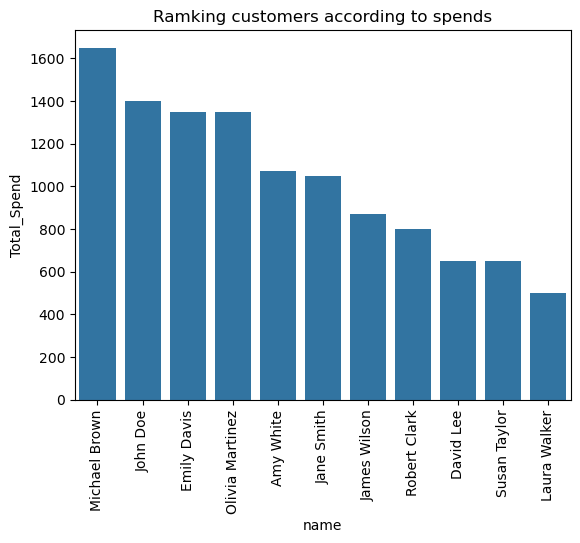

In [31]:
top_valued_customers = df_customer_seg.sort_values(by='Total_Spend', ascending=False)
sns.barplot(x=top_valued_customers['name'], y=top_valued_customers['Total_Spend'])
plt.xticks(rotation=90)
plt.title("Ramking customers according to spends")
plt.savefig(r"C:\Users\Vinayak\Data Analyst - Raw Data (1)\graphs_and_visuals\total_spends.png", dpi=300, bbox_inches="tight")
plt.show()

In [ ]:
# purchase frequency is indicator of consistance
# create a sorted dataset
# aggrigate values by counting order id's

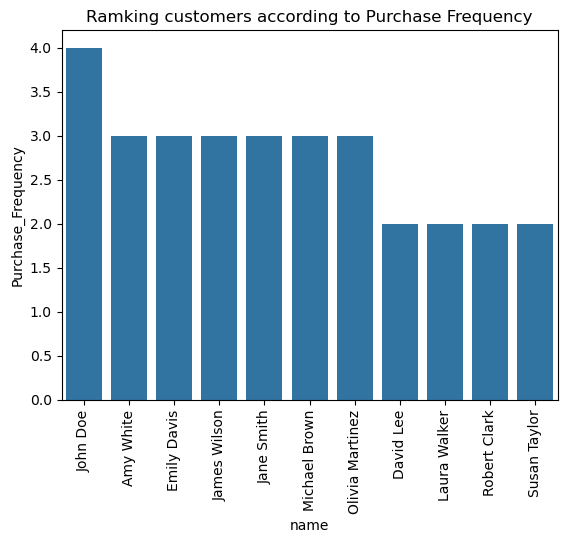

In [21]:
top_valued_customers = df_customer_seg.sort_values(by='Purchase_Frequency', ascending=False)
sns.barplot(x=top_valued_customers['name'], y=top_valued_customers['Purchase_Frequency'])
plt.xticks(rotation=90)
plt.title("Ramking customers according to Purchase Frequency")
plt.savefig(r"C:\Users\Vinayak\Data Analyst - Raw Data (1)\graphs_and_visuals\purchase_freq.png", dpi=300, bbox_inches="tight")
plt.show()


# Average order Value

In [ ]:
# average order value indicates how much range of amount is spent by customers and 
# also the distribution of customers group
# average value os derived by from deviding total amount by order count

In [35]:
df_avg_order_val = df_customer_seg[['name','Average Order Value']].sort_values(by='Average Order Value', ascending=False )

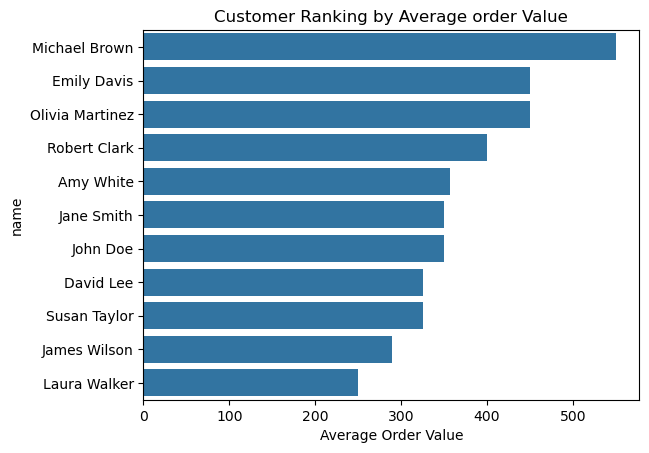

In [33]:
sns.barplot(x=df_avg_order_val['Average Order Value'], y = df_avg_order_val['name'])
#xlabel='Average Order Value'
#ylabel='Customer name'
plt.title("Customer Ranking by Average order Value")
plt.savefig(r"C:\Users\Vinayak\Data Analyst - Raw Data (1)\graphs_and_visuals\avg_total.png", dpi=300, bbox_inches="tight")
plt.show()


# Combined DashBoard

In [51]:
df_clust=df_orders.groupby('total_amount')['customer_id'].count().reset_index()
df_clust

,total_amount,customer_id
0,120,2
1,150,4
2,200,2
3,250,4
4,300,2
5,350,2
6,400,2
7,450,3
8,500,2
9,550,1


# Customer Segmentation

In [53]:
df_clust=df_orders.groupby('total_amount')['customer_id'].count().reset_index()
df_clust

,total_amount,customer_id
0,120,2
1,150,4
2,200,2
3,250,4
4,300,2
5,350,2
6,400,2
7,450,3
8,500,2
9,550,1


In [61]:
scaler = StandardScaler()
df_clusterd = scaler.fit_transform(df_clust)

kmeans=KMeans(n_clusters = 3, random_state=30)

df_clust['segment'] = kmeans.fit_predict(df_clusterd)
df_clust.head()

C:\Users\Vinayak\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,total_amount,customer_id,segment
0,120,2,2
1,150,4,1
2,200,2,2
3,250,4,1
4,300,2,2


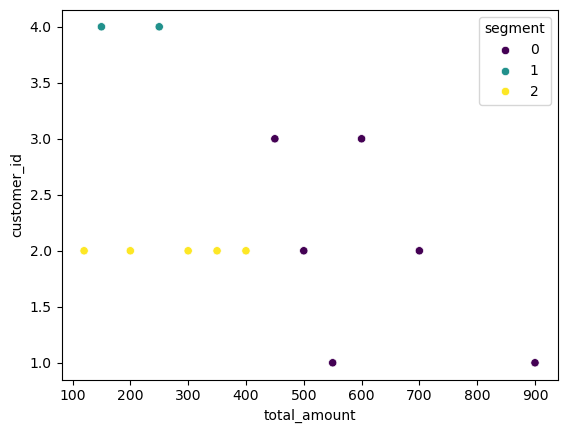

In [65]:
sns.scatterplot(x=df_clust['total_amount'],y=df_clust['customer_id'], hue=df_clust['segment'], palette='viridis')
plt.title=('Customer segmentation')
plt.savefig(r"C:\Users\Vinayak\Data Analyst - Raw Data (1)\graphs_and_visuals\cust_dist.png", dpi=300, bbox_inches="tight")
plt.show()

Segment 1: High-value customers → Spend the most and buy frequently.

Segment 2: Mid-tier customers → Moderate spending and occasional purchases.

Segment 3: Low-spending customers → Infrequent buyers with low total spend.

C:\Users\Vinayak\AppData\Local\Temp\ipykernel_20628\2564239848.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0,0].set_xticklabels(axes[0,0].get_xticklabels())
C:\Users\Vinayak\AppData\Local\Temp\ipykernel_20628\2564239848.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0,1].set_xticklabels(axes[0,1].get_xticklabels())
C:\Users\Vinayak\AppData\Local\Temp\ipykernel_20628\2564239848.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1,0].set_xticklabels(axes[1,0].get_xticklabels())


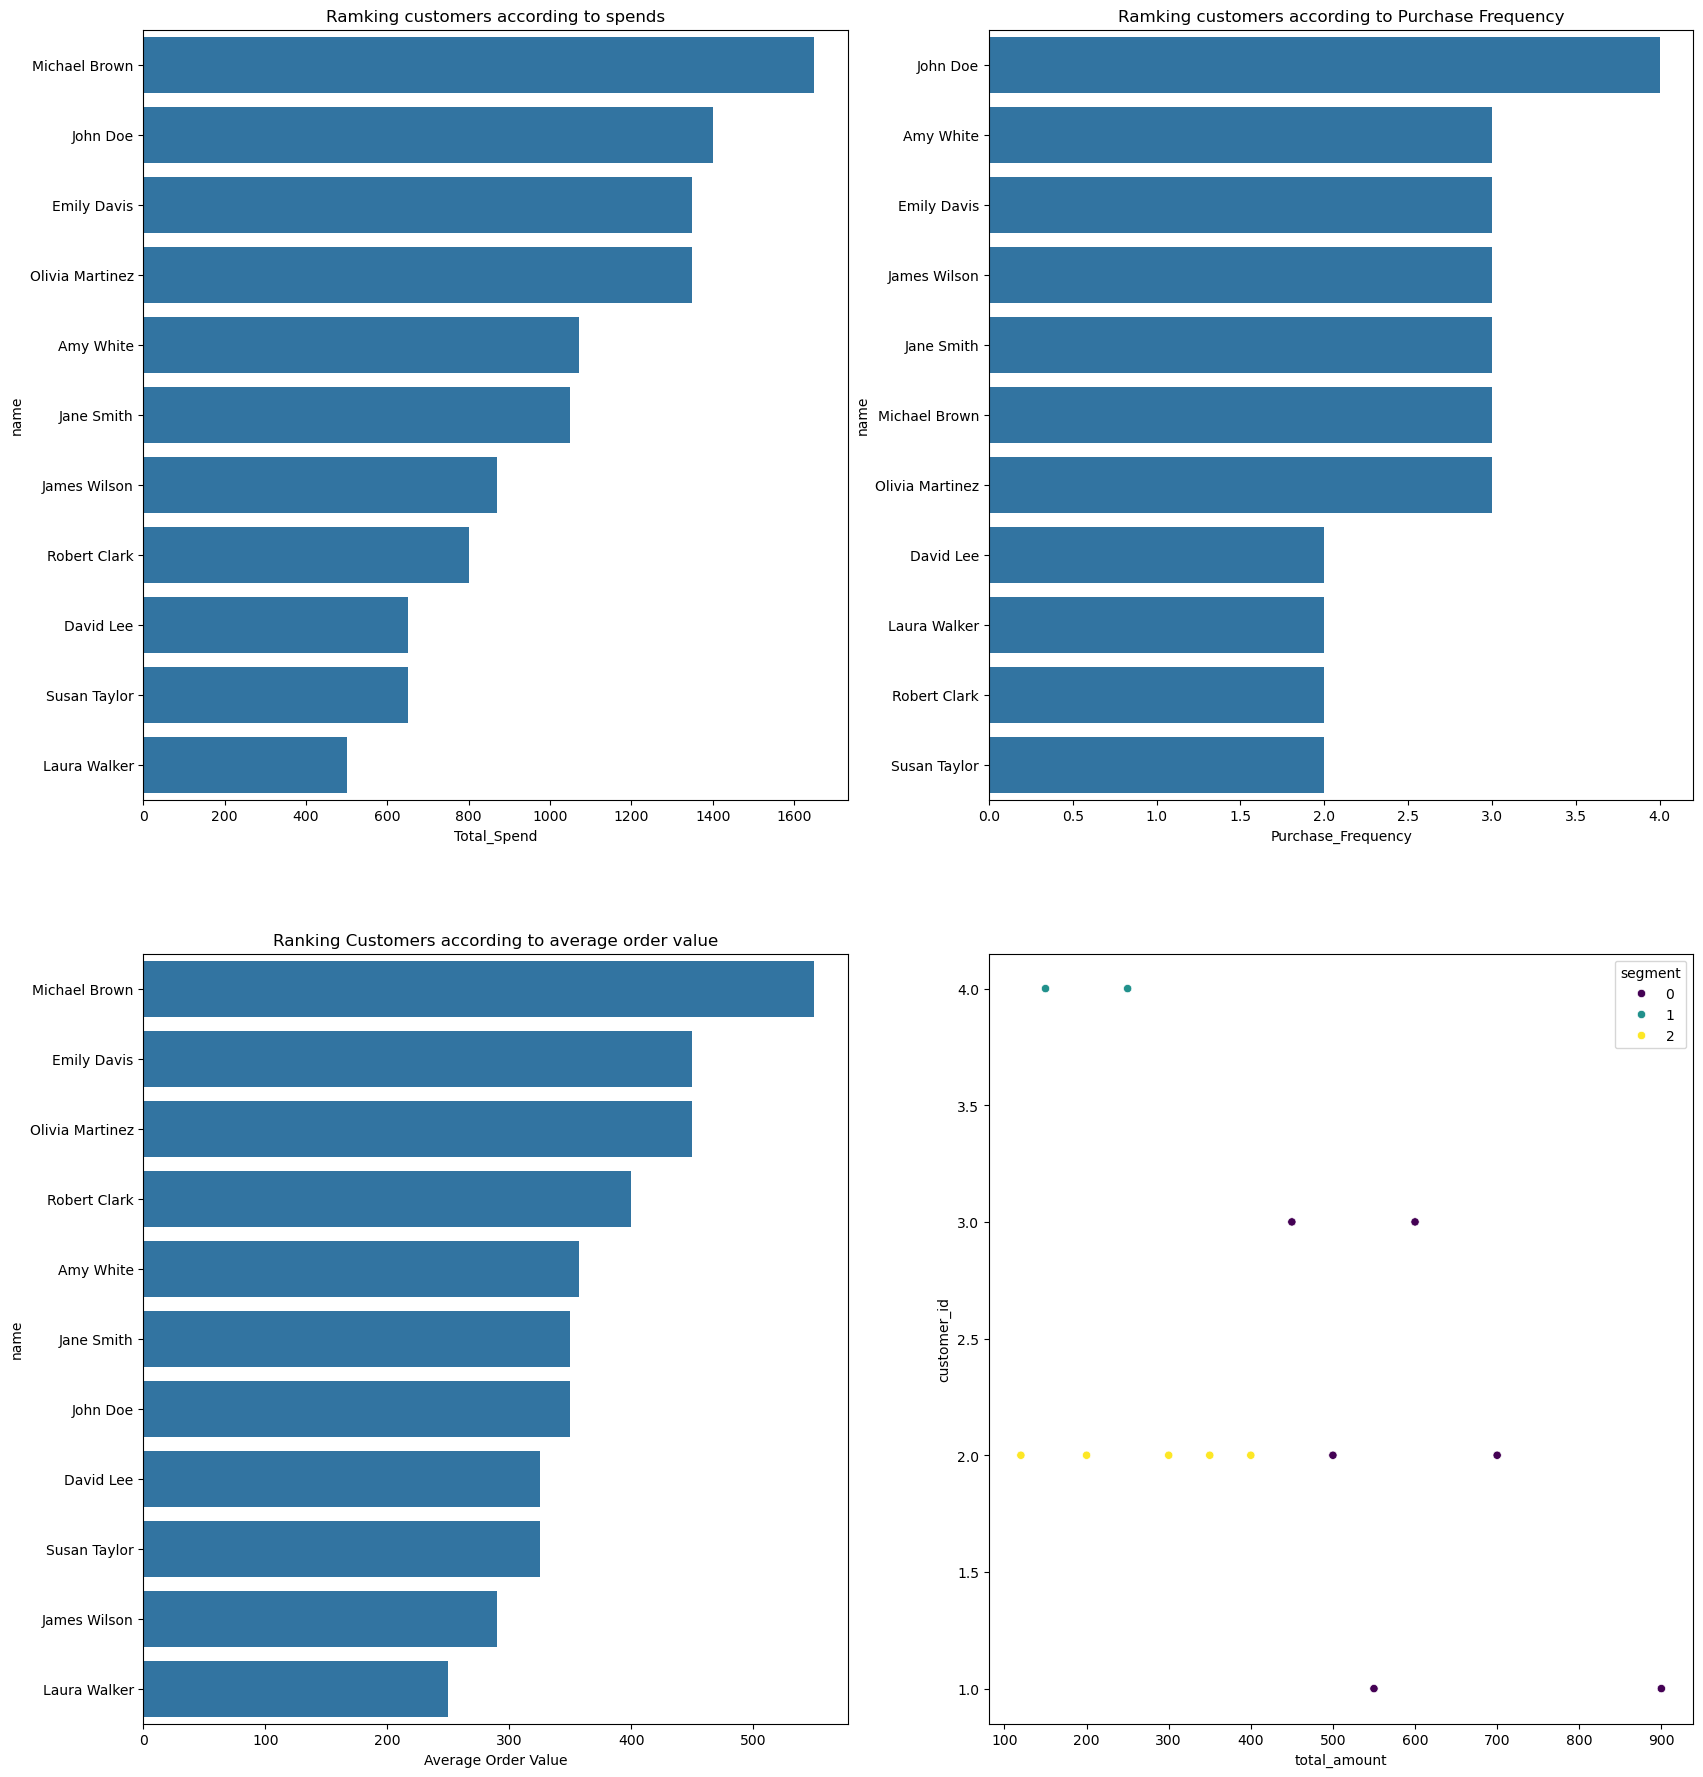

In [63]:
fig, axes = plt.subplots(2, 2, figsize=(20, 22))

top_valued_customers = df_customer_seg.sort_values(by='Total_Spend', ascending=False)
sns.barplot(x=top_valued_customers['Total_Spend'], y=top_valued_customers['name'],ax=axes[0,0])
axes[0,0].set_xticklabels(axes[0,0].get_xticklabels())
axes[0,0].set_title("Ramking customers according to spends")

top_valued_customers = df_customer_seg.sort_values(by='Purchase_Frequency', ascending=False)
sns.barplot(x=top_valued_customers['Purchase_Frequency'], y=top_valued_customers['name'],ax=axes[0,1])
axes[0,1].set_xticklabels(axes[0,1].get_xticklabels())
axes[0,1].set_title("Ramking customers according to Purchase Frequency")


sns.barplot(x=df_avg_order_val['Average Order Value'], y = df_avg_order_val['name'], ax=axes[1,0])
axes[1,0].set_xticklabels(axes[1,0].get_xticklabels())
axes[1,0].set_title('Ranking Customers according to average order value')


sns.scatterplot(x=df_clust['total_amount'],y=df_clust['customer_id'], hue=df_clust['segment'], palette='viridis', ax=axes[1,1])
axes[1,1].set_title=('Customer segmentation')

plt.savefig(r"C:\Users\Vinayak\Data Analyst - Raw Data (1)\graphs_and_visuals\dashboard.png", dpi=300, bbox_inches="tight")

plt.show()